## importing libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### importing csv file 

In [64]:
df=pd.read_csv("ToyotaCorolla.csv",encoding="latin-1")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


### problem statement 

In [18]:
f=open("Toyota Corolla.txt","r") 
required_columns=f.read().split("\n")[2].split("(")[1].replace("\"","").split(")")[0].split(",")
required_columns

['Price',
 'Age_08_04',
 'KM',
 'HP',
 'cc',
 'Doors',
 'Gears',
 'Quarterly_Tax',
 'Weight']

### Removing unwanted features

In [66]:
data=df[required_columns]
data.rename(columns={"Age_08_04":"Age","cc":"CC"},inplace=1)
data.head()

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### EDA

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age            1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   CC             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [391]:
data.describe()

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [23]:
data.duplicated().any()

True

In [68]:
data.drop_duplicates(inplace=True,ignore_index=True)
data.duplicated().any()

False

In [47]:
data.nunique()

Price             236
Age                77
KM               1263
HP                 12
CC                 13
Doors               4
Gears               4
Quarterly_Tax      13
Weight             59
dtype: int64

### Dividing features into category and numerical data

In [70]:
categorical=[i for i in data.columns if data[i].nunique()<15]
categorical

['HP', 'CC', 'Doors', 'Gears', 'Quarterly_Tax']

In [28]:
continuous=[i for i in data.columns if i not in categorical]
continuous

['Price', 'Age', 'KM', 'Weight']

### Correlation between numerical features

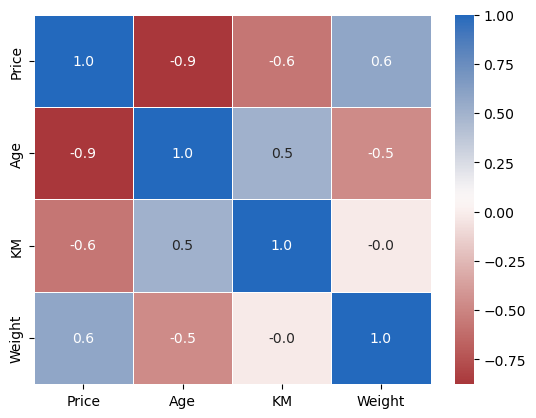

In [42]:
sns.heatmap(data[continuous].corr(),annot=True,cmap="vlag_r",fmt=".1f",linewidths=.5);


### correlation of all features

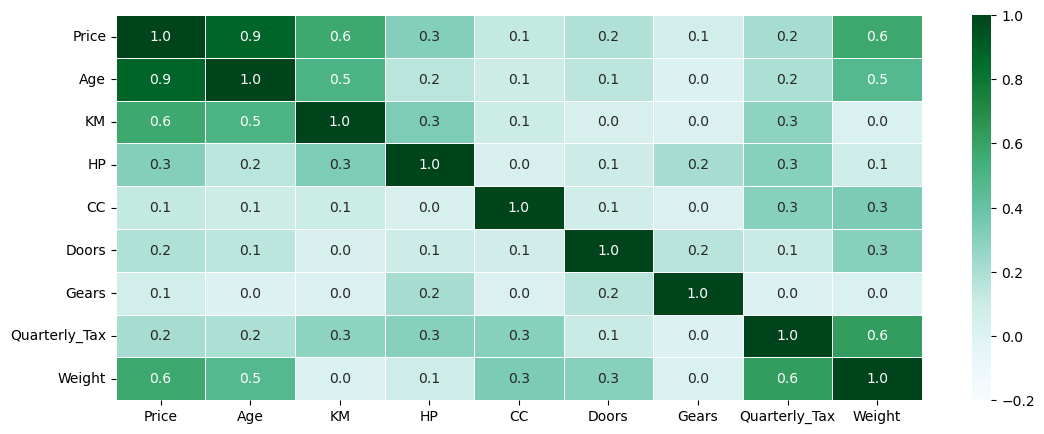

In [356]:
plt.figure(figsize=(13,5))
x=np.sqrt(np.square(data.corr()))
sns.heatmap(x,annot=True,cmap="BuGn",fmt=".1f",vmin=-0.2,linewidths=.5);

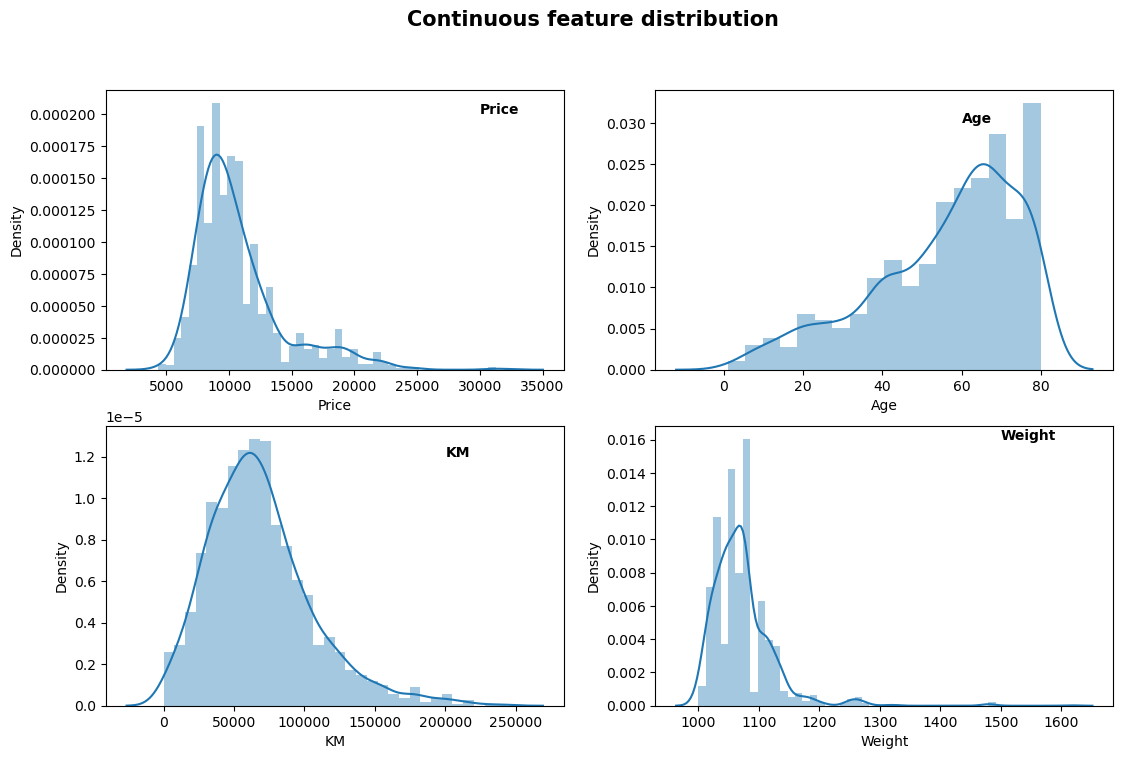

In [411]:
plt.figure(figsize=(13,8))
plt.suptitle("Continuous feature distribution",fontweight="bold",fontsize=15)
for i,j in zip(continuous,[221,222,223,224]):
    plt.subplot(j)
    sns.distplot(data[i])
    plt.text(s=i,x=plt.xticks()[0][-3],y=plt.yticks()[0][-2],fontweight="bold");

### --> The features are not normally distributed<br />
### Transforming the data to attain normal distribution

In [251]:
#transformation
def transform(data,tr):
    plt.figure(figsize=(9.5,.7),frameon=0)
    plt.text(s=tr,x=.4,y=0.4,fontsize=17,fontweight="bold",ha="center")
    for i in data[continuous].columns:
        plt.figure(figsize=(10,5))
        plt.suptitle(i,fontsize=15,fontweight="bold")
        plt.subplot(121)
        sns.histplot(data[i],kde=1);
        plt.subplot(122)
        st.probplot(data[i],dist="norm",plot=plt);

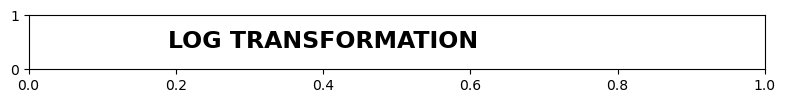

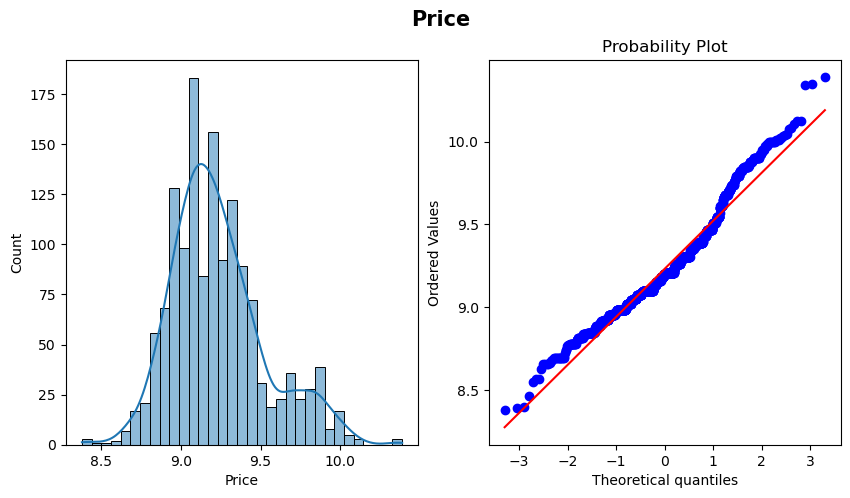

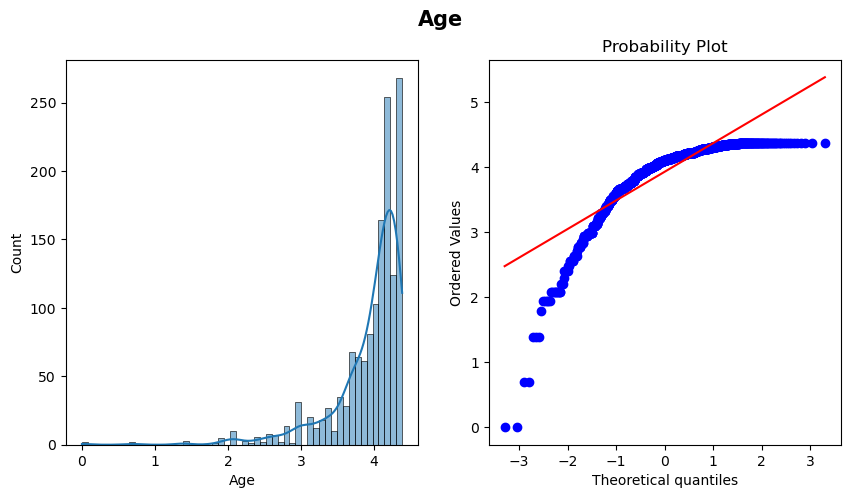

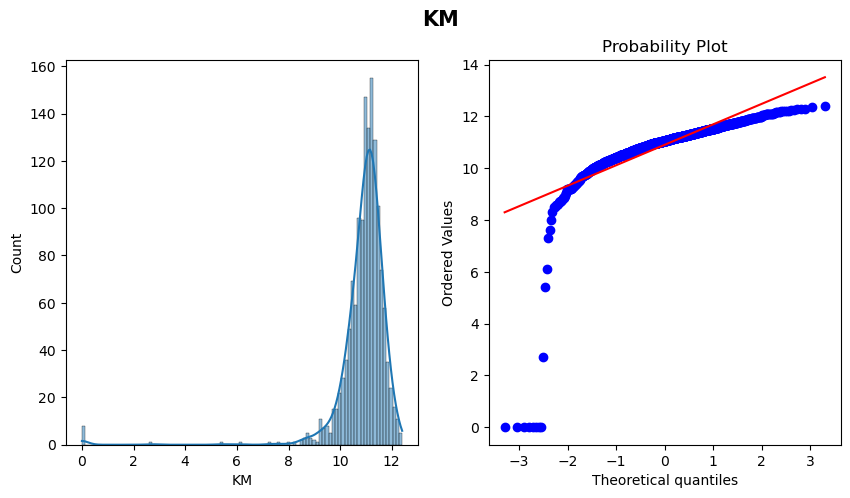

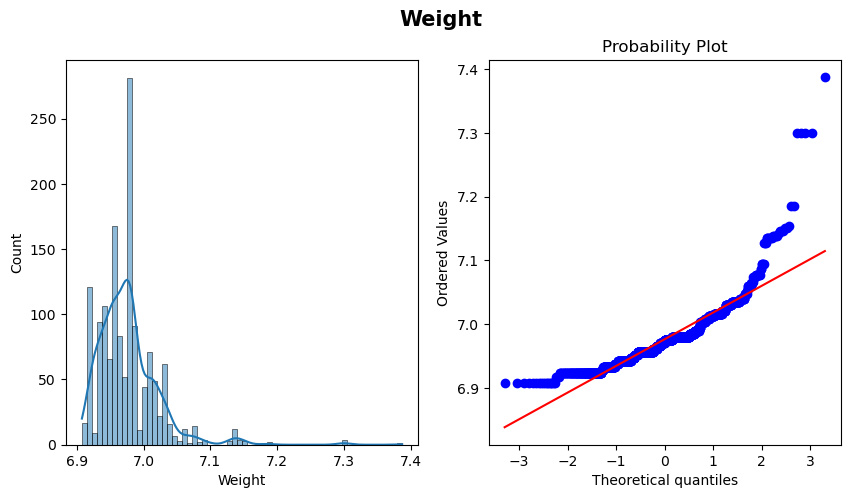

In [253]:
#log transformation
transform(np.log(data),"LOG TRANSFORMATION")

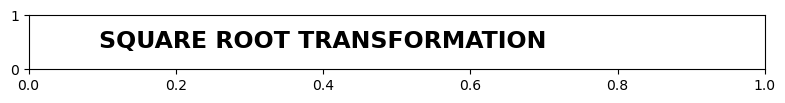

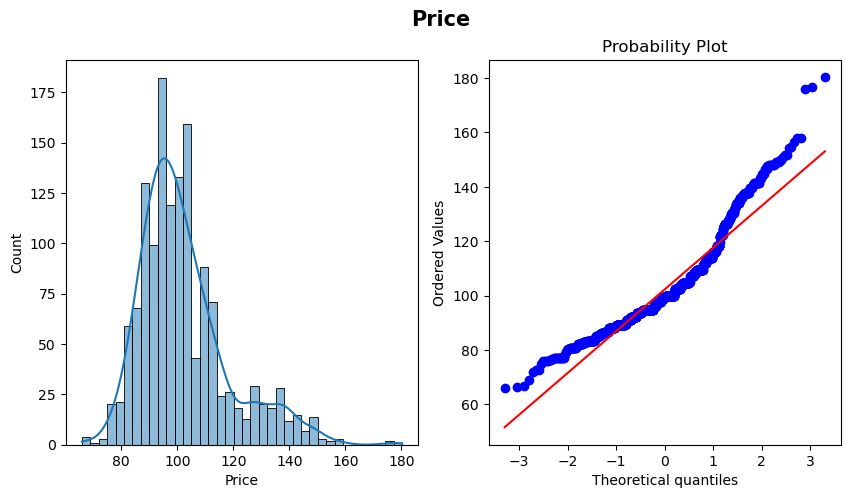

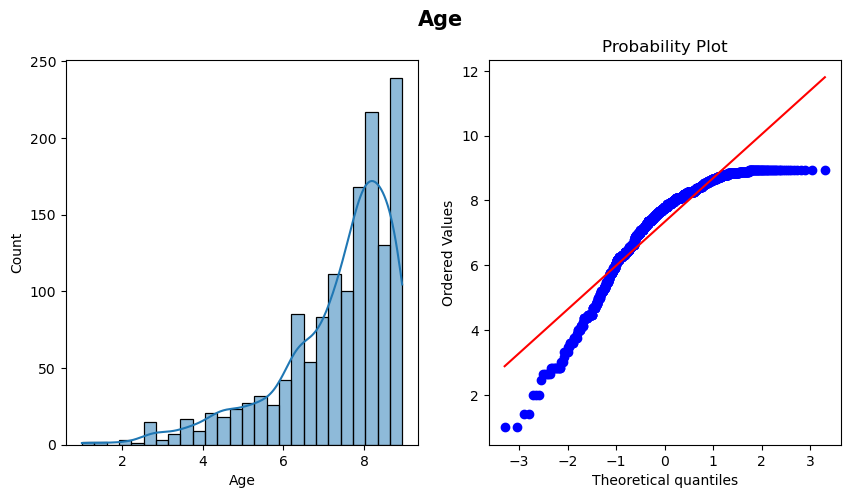

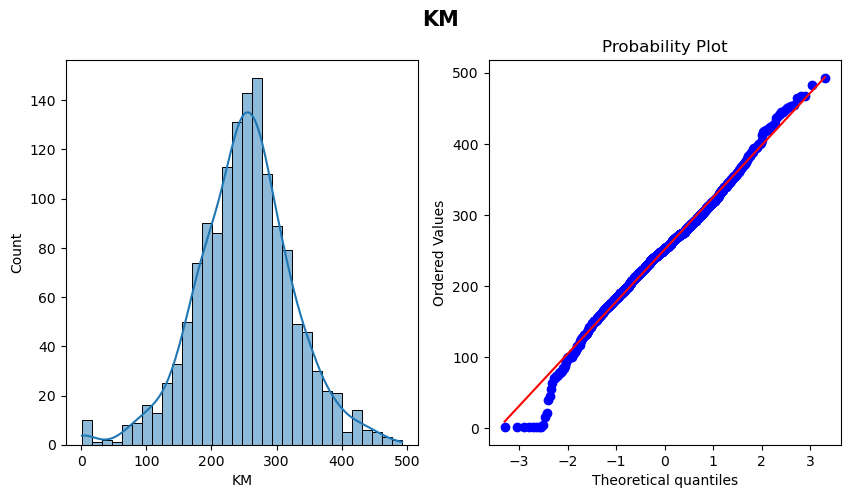

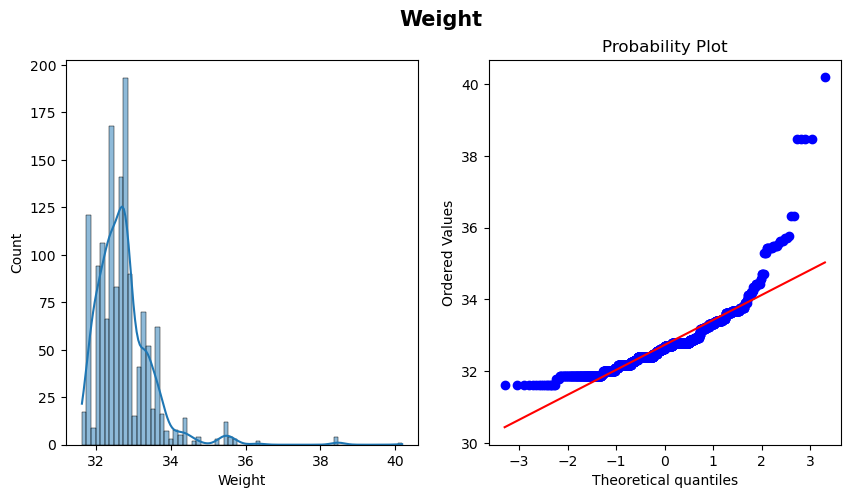

In [255]:
#square root transformation
transform(np.sqrt(data),"SQUARE ROOT TRANSFORMATION")

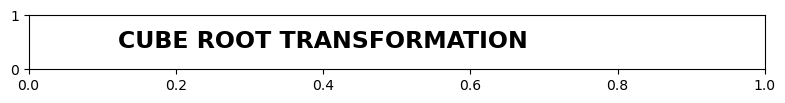

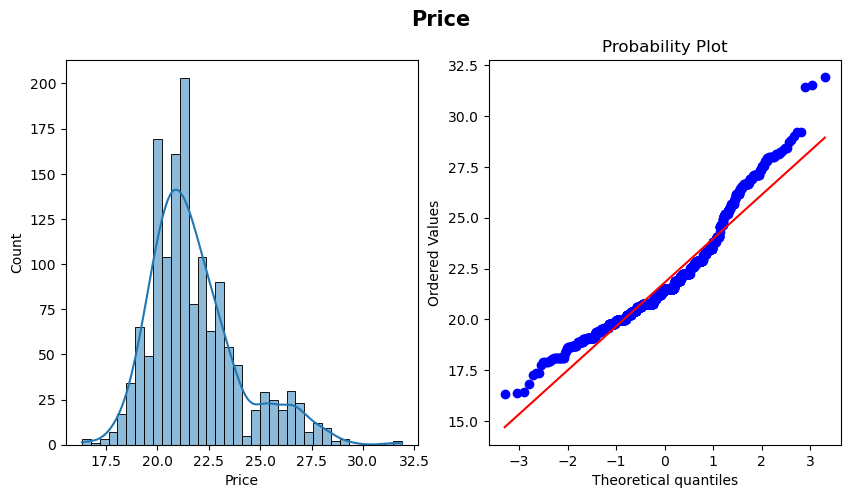

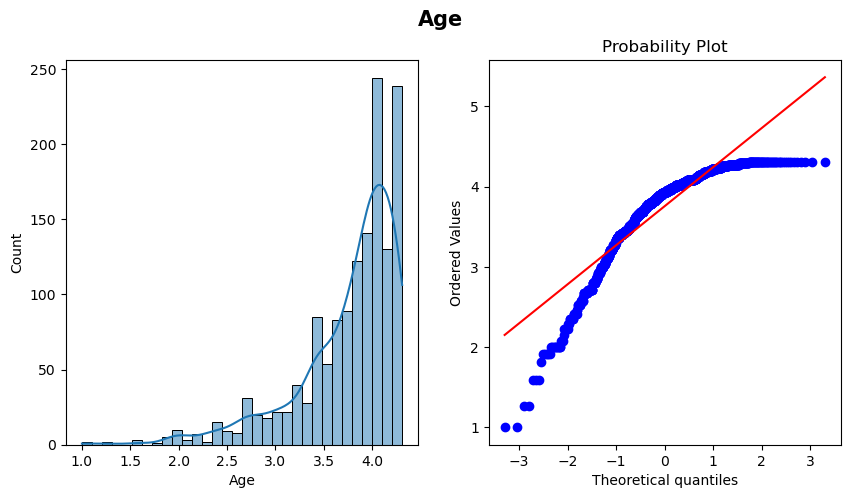

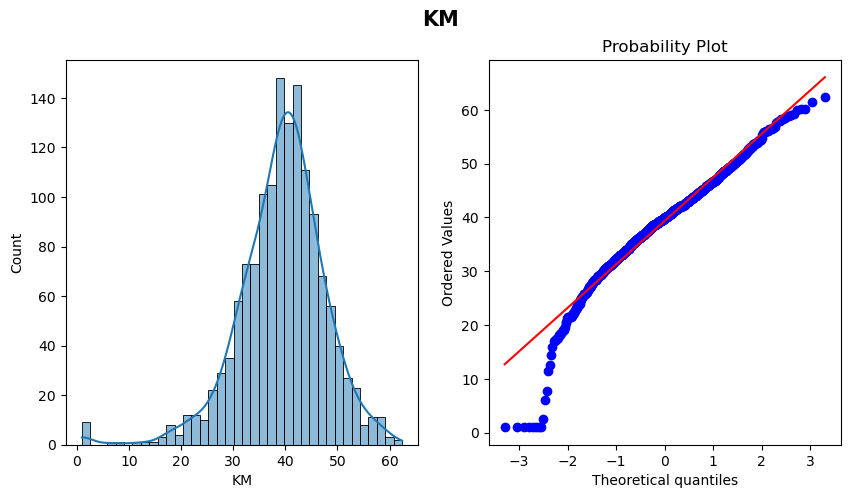

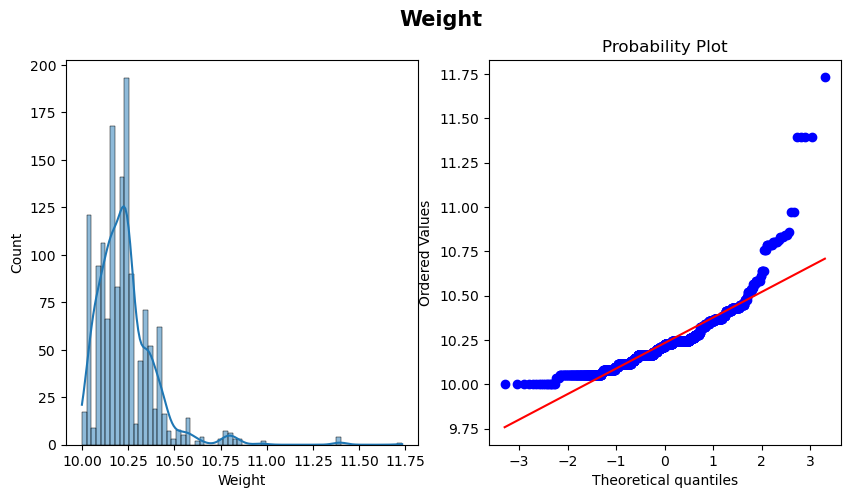

In [257]:
#cube root transformation
transform(np.cbrt(data),"CUBE ROOT TRANSFORMATION")

### Relation between target variable "Price" and numerical features

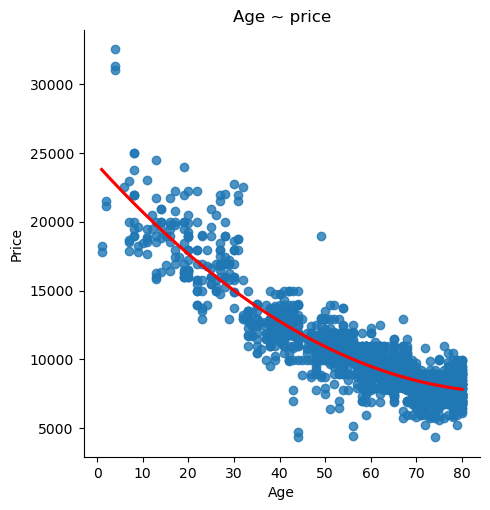

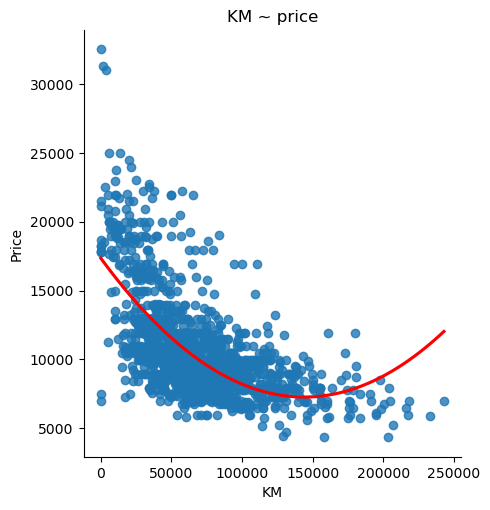

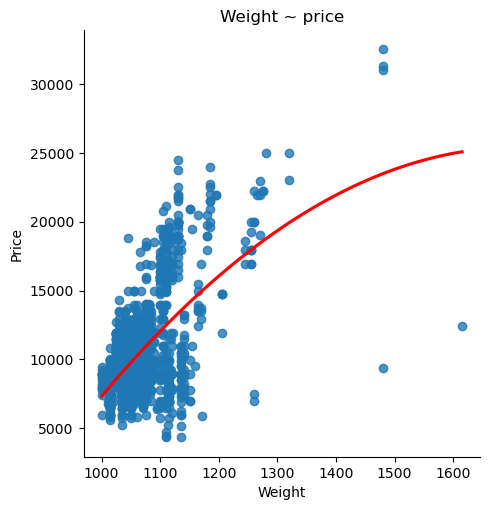

In [533]:
for i in data[continuous[1:]]:
    sns.lmplot(data,x=i,y="Price",ci=None,order=2,line_kws=({"color":"red"}))
    plt.title(f"{i} ~ price")

#### --> conclusion
+ Age and price are linearly related<br/>
+ Km and price have good relation
+ price doesnt realy depend on weight

### Categorical data

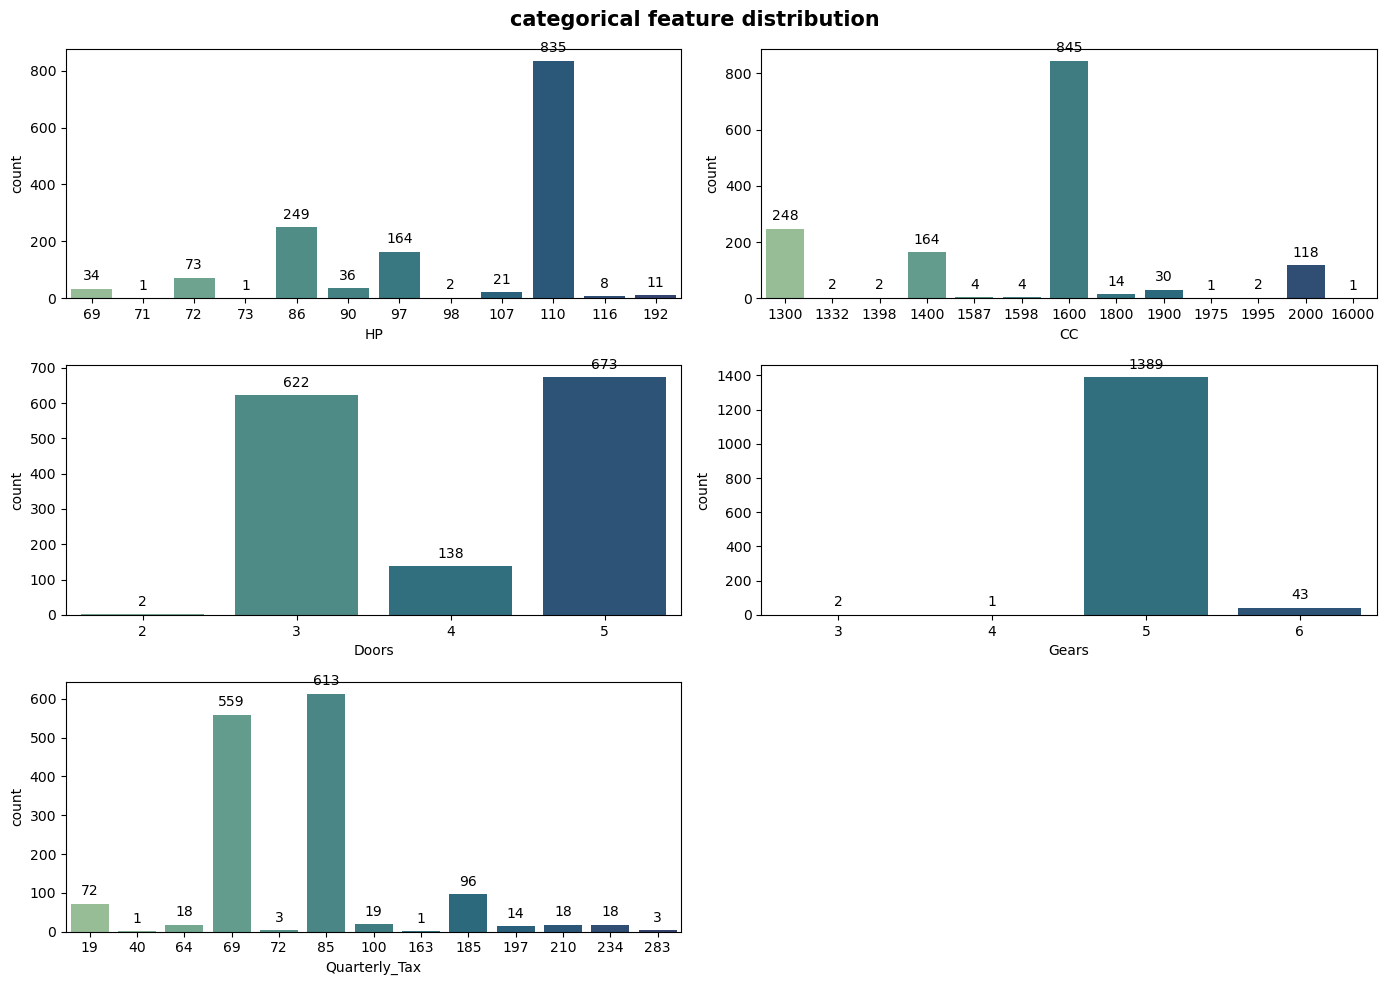

In [440]:
plt.figure(figsize=(14,10))
plt.suptitle("categorical feature distribution",fontweight="bold",fontsize=15)
for i,j in zip(categorical,[321,322,323,324,325]):
    plt.subplot(j)
    ax=sns.countplot(data,x=i,palette="crest",tick_label=5)
    for bar in ax.patches:
         ax.annotate(format(bar.get_height(), '.0f'), 
                (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.tight_layout()

### Relation between target variable "Price" and categorical features

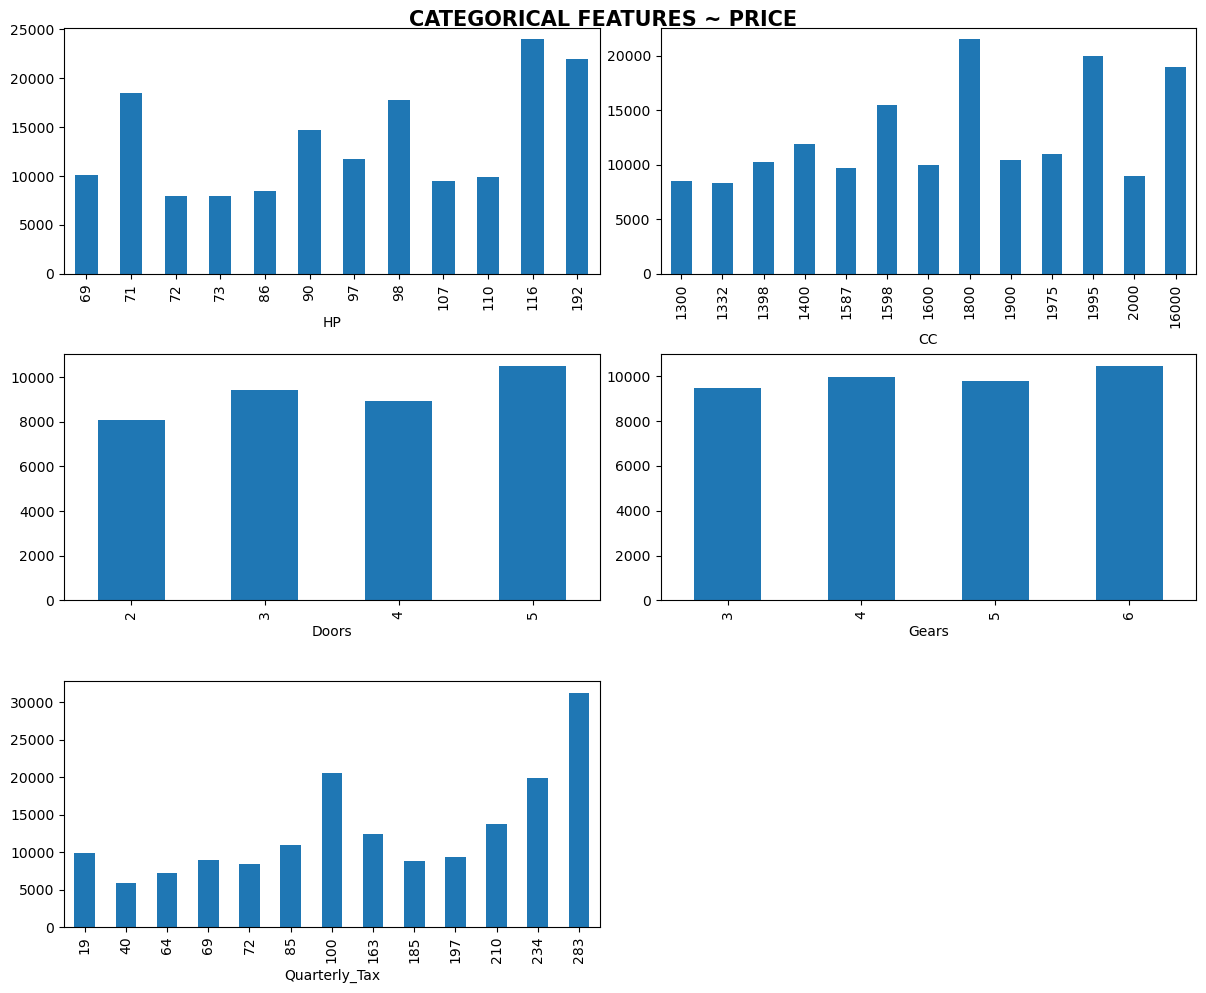

In [531]:
plt.figure(figsize=(12,10))
plt.suptitle("CATEGORICAL FEATURES ~ PRICE",fontweight="bold",fontsize=15)
for i,j in zip(categorical,[321,322,323,324,325]):
    plt.subplot(j)
    data.groupby(i)["Price"].median().plot.bar()
plt.tight_layout(pad=.5)

#### -->conclusion
+ Gears and Doors does not have any impact on the target variable

### 1 . Simple model
Building model without any transformation

In [25]:
x="+".join(data.columns[1:])
x

'Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight'

In [156]:
def evaluate_model(mdl,x=None):
    s_r2,s_ar2,s_rmse=mdl.rsquared,mdl.rsquared_adj,np.sqrt(mdl.mse_resid)
    if x==None:
        print("Rsquare : ",s_r2,"\nAdj_rsquare : ",s_ar2,"\nRmse : ",s_rmse)
    else:
        return s_r2,s_ar2,s_rmse

In [34]:
simple_model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight",data=data).fit()
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:19:33   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age            -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
CC               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [162]:
evaluate_model(simple_model)

Rsquare :  0.8625200256947001 
Adj_rsquare :  0.8617487495415147 
Rmse :  1341.8046186938675


### 2 . Numerical model
model with only numerical features

In [166]:
num_model=smf.ols("Price~Age+KM+Weight",data=data).fit()
num_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     2624.
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:14:38   Log-Likelihood:                -12436.
No. Observations:                1434   AIC:                         2.488e+04
Df Residuals:                    1430   BIC:                         2.490e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1691.0418    967.822     -1.747      0.081   -3589.544     207.461
Age         -120.2605      2.741    -43.875      0.000    -125.637    -114.884
KM            -0.0241      0.001    -20.052      0.000      -0.026      -0.022
Weight        19.3931      0.842     23.038      0.000      17.742      21.044
==============================================================================
Omnibus:                      215.013   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2145.620
Skew:                          -0.345   Prob(JB):                         0.00
Kurtosis:                       8.953   Cond. No.                     2.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [170]:
evaluate_model(num_model)

Rsquare :  0.8462648380721391 
Adj_rsquare :  0.8459423167534094 
Rmse :  1414.3552993066587


### 3 . modified model
removing Doors and Gears features as they have less relation on target variable

In [173]:
modified_model=smf.ols("Price~Age+KM+HP+CC+Quarterly_Tax+Weight",data=data).fit()
modified_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1554.
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:14:44   Log-Likelihood:                -12330.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1427   BIC:                         2.471e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3545.1736   1037.065     -3.418      0.001   -5579.510   -1510.837
Age            -120.6212      2.567    -46.983      0.000    -125.657    -115.585
KM               -0.0176      0.001    -13.768      0.000      -0.020      -0.015
HP               40.9885      2.828     14.492      0.000      35.440      46.537
CC               -2.5209      0.307     -8.213      0.000      -3.123      -1.919
Quarterly_Tax     9.2506      1.426      6.486      0.000       6.453      12.048
Weight           19.7764      1.081     18.294      0.000      17.656      21.897
==============================================================================
Omnibus:                      234.125   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2413.958
Skew:                          -0.416   Prob(JB):                         0.00
Kurtosis:                       9.302   Cond. No.                     2.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [175]:
evaluate_model(modified_model)

Rsquare :  0.8672857000800137 
Adj_rsquare :  0.8667276862050873 
Rmse :  1315.4877541631552


---

# Transforming features before model building

### Log transformation

In [177]:
log_model=smf.ols("Price~Age+KM+Weight+HP+CC+Doors+Gears+Quarterly_Tax",data=np.log(data)).fit()
log_model.summary();
evaluate_model(log_model)

Rsquare :  0.7590383887067796 
Adj_rsquare :  0.757685621766186 
Rmse :  0.14523817193819388


### Square root transformation

In [179]:
sqrt_model=smf.ols("Price~Age+KM+Weight+HP+CC+Doors+Gears+Quarterly_Tax",data=np.sqrt(data)).fit()
#sqrt_model.summary()
evaluate_model(sqrt_model)

Rsquare :  0.8669322347713239 
Adj_rsquare :  0.8661851876682857 
Rmse :  5.859378454199674


### Cube root transformation

In [181]:
cbrt_model=smf.ols("Price~Age+KM+Weight+HP+CC+Doors+Gears+Quarterly_Tax",data=np.cbrt(data)).fit()
#cbrt_model.summary()
evaluate_model(cbrt_model)

Rsquare :  0.84449363867438 
Adj_rsquare :  0.8436206205055343 
Rmse :  0.8817159937293854


### ---> conclusion
####  Transformation doesnt improve model accuracy.

---

## outliers handling

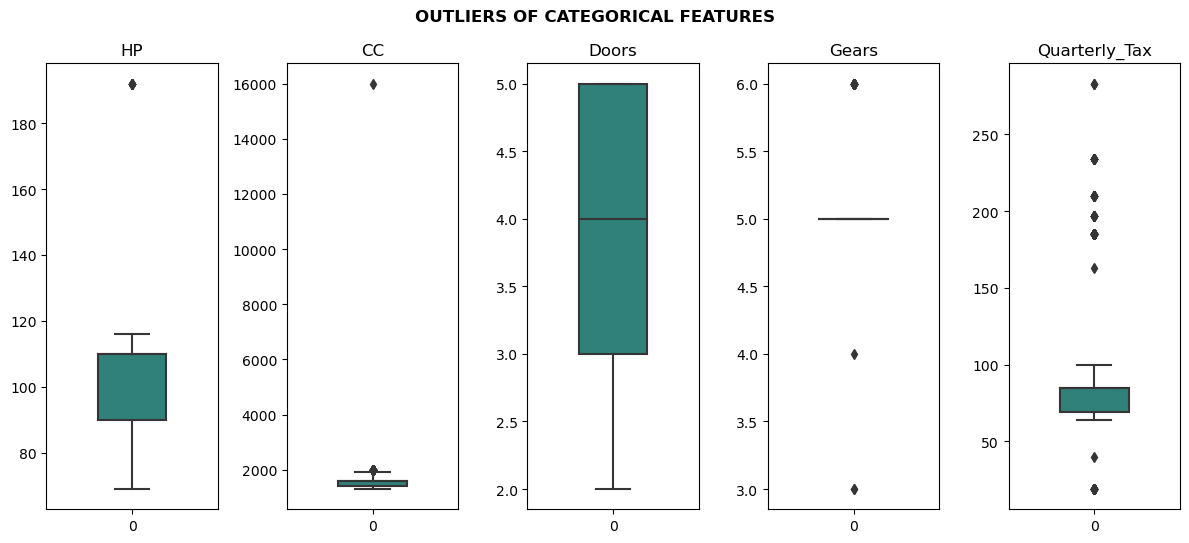

In [693]:
fig,axs=plt.subplots(1,5,figsize=(12,5.5))
plt.suptitle("OUTLIERS OF CATEGORICAL FEATURES",fontweight="bold")
for j,i in enumerate(data[categorical]):
    sns.boxplot(data[i],ax=axs[j],width=0.4,color="#238E84")
    axs[j].set_title(i)
plt.tight_layout()


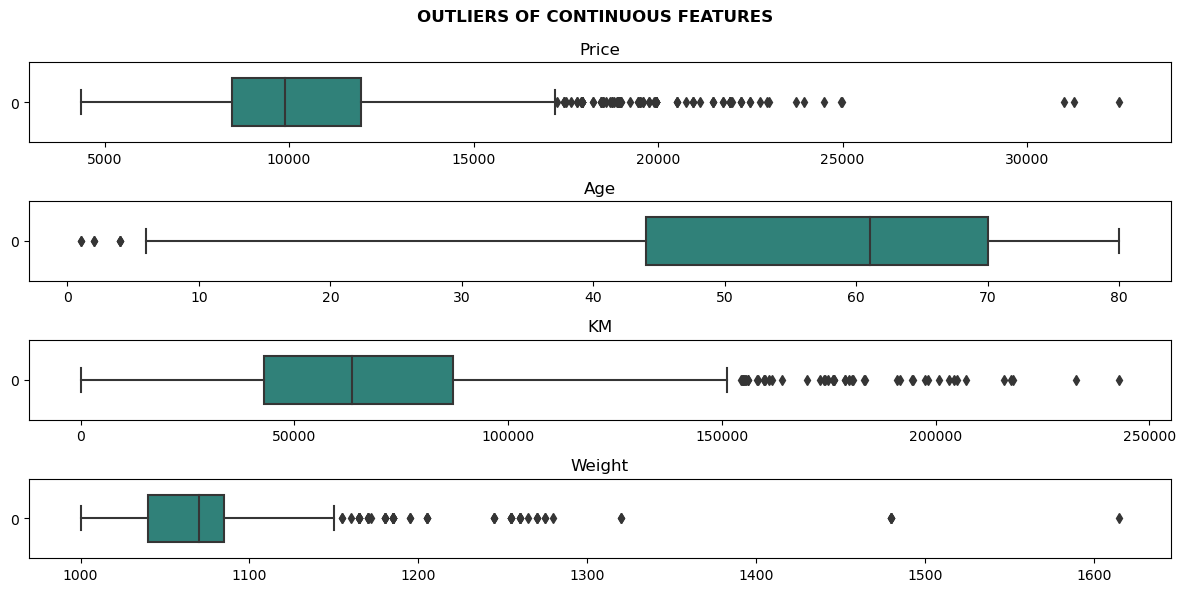

In [217]:
fig,axs=plt.subplots(4,1,figsize=(12,6))
plt.suptitle("OUTLIERS OF CONTINUOUS FEATURES",fontweight="bold")
for j,i in enumerate(data[continuous]):
    sns.boxplot(data[i],ax=axs[j],width=0.6,color="#238E84",orient="h")
    axs[j].set_title(i)
plt.tight_layout()


## Handling categorical features

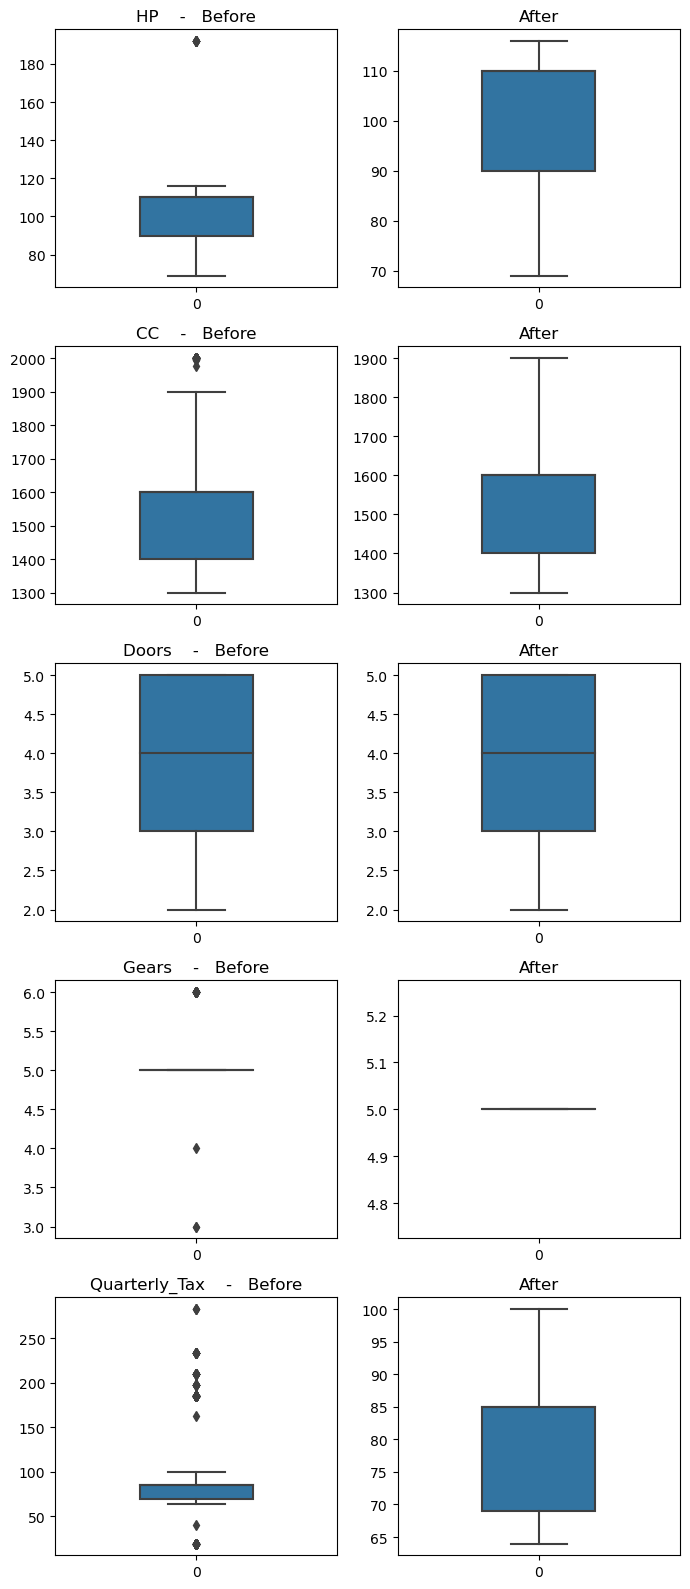

In [140]:
#mode imputation
dff=data.copy()
plt.subplots(5,2,figsize=(7,16))
k=1
for i in categorical:
    plt.subplot(5,2,k)
    plt.title(i+"    -   Before")
    sns.boxplot(dff[i],width=.4)
    for j in dff[i]:
        q1=np.percentile(dff[i],25)
        q3=np.percentile(dff[i],75)
        iqr=q3-q1
        mode=dff[i].mode()[0]
        ue=q3+1.5*iqr
        le=q1-1.5*iqr
        if j>ue or j<le:
            dff[i].replace(j,mode,inplace=True)
    k+=1
    plt.subplot(5,2,k)
    k+=1
    sns.boxplot(dff[i],width=0.4)
    plt.title("After")
plt.tight_layout()   

### model after mode imputation

In [142]:
mod_model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight",data=dff).fit()
evaluate_model(mod_model)
mod_model.summary()

Rsquare :  0.8568982735278428 
Adj_rsquare :  0.8561958106349219 
Rmse :  1366.4778925037367


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1220.
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:03:17   Log-Likelihood:                -12384.
No. Observations:                1434   AIC:                         2.478e+04
Df Residuals:                    1426   BIC:                         2.483e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -168.2612     38.164     -4.409      0.000    -243.124     -93.398
Age            -121.8213      2.682    -45.417      0.000    -127.083    -116.560
KM               -0.0183      0.001    -13.881      0.000      -0.021      -0.016
HP               33.4846      3.655      9.161      0.000      26.314      40.655
CC               -2.4019      0.367     -6.544      0.000      -3.122      -1.682
Doors          -113.2621     42.929     -2.638      0.008    -197.474     -29.051
Gears          -841.3060    190.819     -4.409      0.000   -1215.622    -466.990
Quarterly_Tax    22.4037      5.903      3.796      0.000      10.825      33.982
Weight           20.6721      0.987     20.951      0.000      18.737      22.608
==============================================================================
Omnibus:                      225.190   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2730.753
Skew:                          -0.298   Prob(JB):                         0.00
Kurtosis:                       9.734   Cond. No.                     9.73e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.26e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### --> conclusion 
####   Mode imputation doesnt improve the model performance

-------------

## Handling numerical features

### median imputation

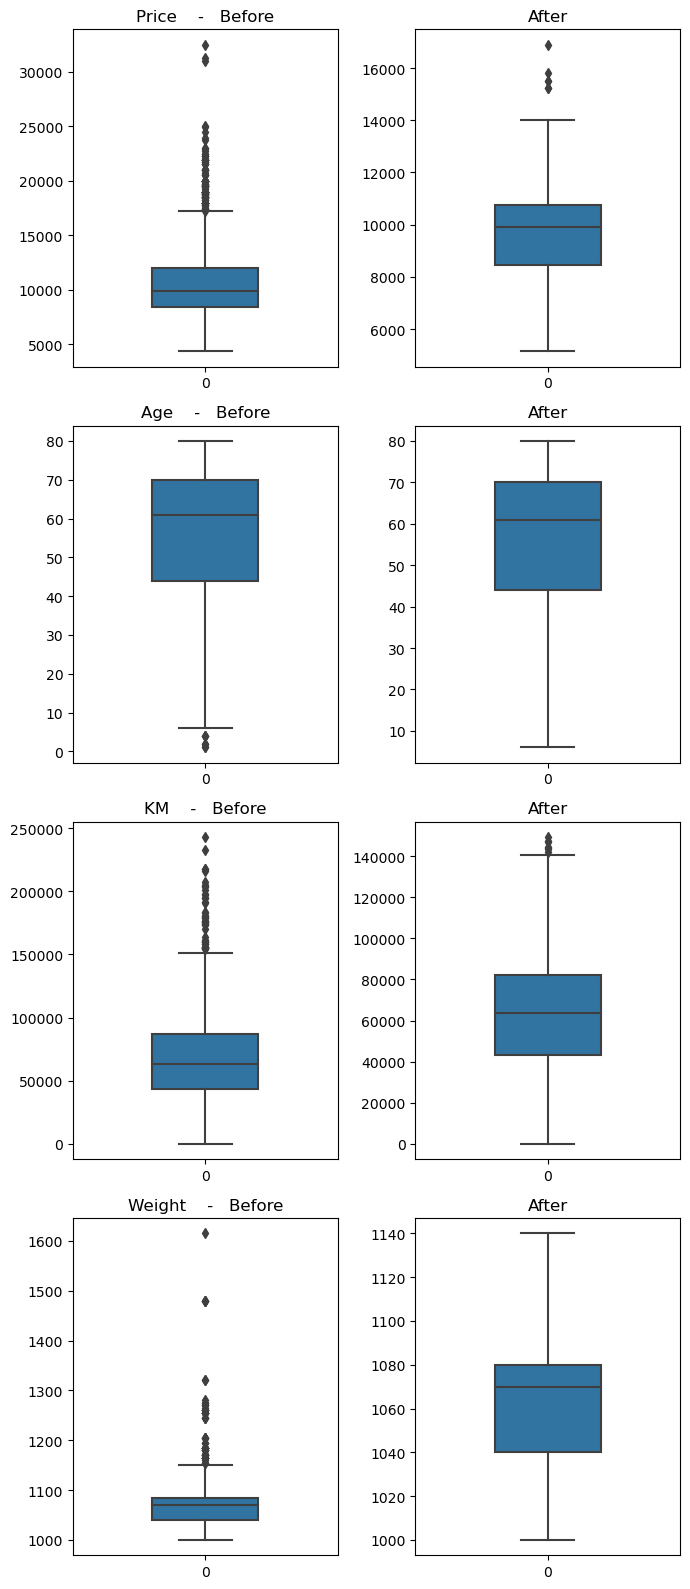

In [146]:
#median imputation
plt.subplots(4,2,figsize=(7,16))
k=1
for i in continuous:
    plt.subplot(4,2,k)
    plt.title(i+"    -   Before")
    sns.boxplot(dff[i],width=.4)
    for j in dff[i]:
        q1=np.percentile(dff[i],25)
        q3=np.percentile(dff[i],75)
        iqr=q3-q1
        med=np.median(dff[i])
        ue=q3+1.5*iqr
        le=q1-1.5*iqr
        if j>ue or j<le:
            dff[i].replace(j,med,inplace=True)
    k+=1
    plt.subplot(4,2,k)
    k+=1
    sns.boxplot(dff[i],width=0.4)
    plt.title("After")
plt.tight_layout()   

#### Model after median imputation

In [148]:
med_model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight",data=dff).fit()
evaluate_model(med_model)
med_model.summary()

Rsquare :  0.3932962194966526 
Adj_rsquare :  0.390318010195444 
Rmse :  1397.2035457047393


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     132.1
Date:                Mon, 26 Feb 2024   Prob (F-statistic):          7.33e-150
Time:                        18:04:13   Log-Likelihood:                -12416.
No. Observations:                1434   AIC:                         2.485e+04
Df Residuals:                    1426   BIC:                         2.489e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       815.4228     66.992     12.172      0.000     684.010     946.836
Age             -53.9250      2.619    -20.590      0.000     -59.062     -48.788
KM               -0.0051      0.002     -3.355      0.001      -0.008      -0.002
HP                5.7962      3.605      1.608      0.108      -1.275      12.868
CC                2.1248      0.404      5.253      0.000       1.331       2.918
Doors           250.8579     45.563      5.506      0.000     161.480     340.236
Gears          4077.1138    334.959     12.172      0.000    3420.049    4734.179
Quarterly_Tax    22.9741      6.424      3.576      0.000      10.373      35.576
Weight          -13.9412      1.969     -7.082      0.000     -17.803     -10.080
==============================================================================
Omnibus:                       10.054   Durbin-Watson:                   1.188
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.065
Skew:                           0.203   Prob(JB):                      0.00652
Kurtosis:                       3.056   Cond. No.                     8.76e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.35e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

-------------------------------------------------------------------

### Mean imputation

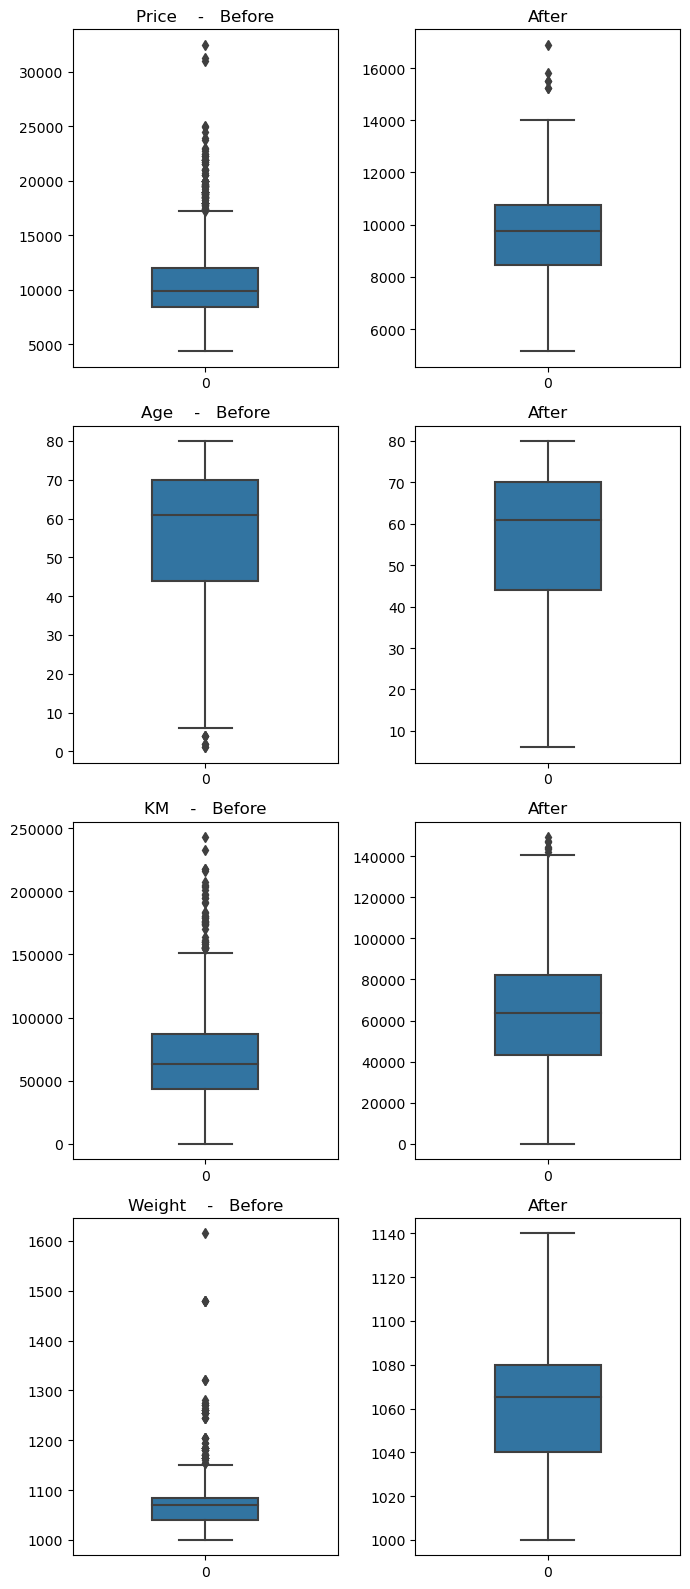

In [150]:
#mean imputation
dff=data.copy()
plt.subplots(4,2,figsize=(7,16))
k=1
for i in continuous:
    plt.subplot(4,2,k)
    plt.title(i+"    -   Before")
    sns.boxplot(dff[i],width=.4)
    for j in dff[i]:
        q1=np.percentile(dff[i],25)
        q3=np.percentile(dff[i],75)
        iqr=q3-q1
        mean=dff[i].mean()
        ue=q3+1.5*iqr
        le=q1-1.5*iqr
        if j>ue or j<le:
            dff[i].replace(j,mean,inplace=True)
    k+=1
    plt.subplot(4,2,k)
    k+=1
    sns.boxplot(dff[i],width=0.4)
    plt.title("After")
plt.tight_layout()   

In [152]:
mean_model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight",data=dff).fit()
evaluate_model(mean_model)
mean_model.summary()

Rsquare :  0.4161741848100021 
Adj_rsquare :  0.4128965661984091 
Rmse :  1379.8446214244552


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     127.0
Date:                Mon, 26 Feb 2024   Prob (F-statistic):          1.32e-160
Time:                        18:04:36   Log-Likelihood:                -12398.
No. Observations:                1434   AIC:                         2.481e+04
Df Residuals:                    1425   BIC:                         2.486e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.494e+04   1877.714      7.956      0.000    1.13e+04    1.86e+04
Age             -57.4584      2.662    -21.584      0.000     -62.680     -52.236
KM               -0.0055      0.002     -3.606      0.000      -0.008      -0.003
HP                7.2710      2.976      2.443      0.015       1.433      13.109
CC                0.8090      0.345      2.347      0.019       0.133       1.485
Doors           286.1538     44.511      6.429      0.000     198.839     373.468
Gears           557.3499    202.716      2.749      0.006     159.695     955.005
Quarterly_Tax    -1.0321      1.412     -0.731      0.465      -3.801       1.737
Weight           -7.0730      1.732     -4.083      0.000     -10.471      -3.675
==============================================================================
Omnibus:                        8.670   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.617
Skew:                           0.185   Prob(JB):                       0.0135
Kurtosis:                       3.086   Cond. No.                     3.65e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### -->conclusion
#### Mean and median imputation reduce the model performance drastically.

---

# Influence points

Large cook distanced is 78.72950582256864 at position 80



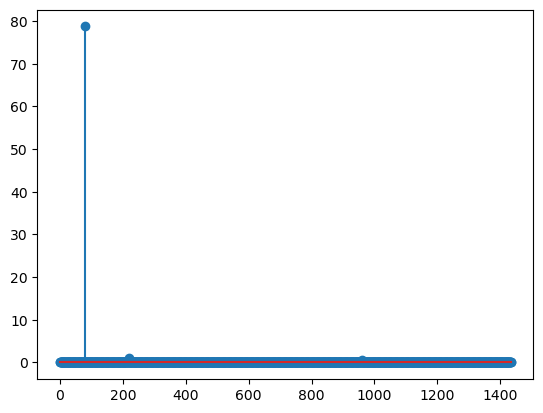



The data point at positon 80 :



,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [72]:
points=simple_model.get_influence()
cooks=points.cooks_distance[0]
plt.stem(np.arange(len(cooks)),cooks);
print(f"Large cook distanced is {cooks.max()} at position {cooks.argmax()}\n")
plt.show()
print("\n\nThe data point at positon 80 :\n")
data[data.index==cooks.argmax()]

#### Dropping the influence point

In [74]:
data.shape

(1435, 9)

In [76]:
data=data.drop(index=cooks.argmax(),axis=0).reset_index(drop=True)
data.shape

(1434, 9)

----

### Scaling the data

In [106]:
X=data.iloc[:,1:]
y=data.iloc[:,0:1]

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
def build_model(x_tr,y_tr,x_ts,y_ts):
    from sklearn.linear_model import LinearRegression
    model=LinearRegression()
    model.fit(x_tr,y_tr)
    y_pred_train=model.predict(x_tr)
    y_pred_test=model.predict(x_ts)
    tr_score=r2_score(y_tr,y_pred_train)
    ts_score=r2_score(y_ts,y_pred_test)
    y_pred_unscaled=y_scaler.inverse_transform(y_pred_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred_unscaled))
    print(f"Train Score : {tr_score}\nTest score: {ts_score}\nMse : {rmse}")
    return tr_score,rmse

### 1) Standard scalar

In [191]:
from sklearn.preprocessing import StandardScaler
x_scaler=StandardScaler().fit(x_train)
x_train_scaled=x_scaler.transform(x_train)
x_test_scaled=x_scaler.transform(x_test)
y_scaler=StandardScaler().fit(y_train)
y_train_scaled=y_scaler.transform(y_train)
y_test_scaled=y_scaler.transform(y_test)
standard_scaled_model=build_model(x_train_scaled,y_train_scaled,x_test_scaled,y_test_scaled)

Train Score : 0.8695449319139339
Test score: 0.8595189949438783
Mse : 0.337433561187342


### 2) Min max scaler

In [136]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train,y_train)
x_test=scaler.transform(x_test)
minmax_scaled_model=build_model(x_train,y_train,x_test,y_test)

Train Score : 0.8695449319139339
Test score: 0.8595189949438783
Mse : 0.337433561187342


In [199]:
models=[simple_model,num_model,modified_model,log_model,sqrt_model,cbrt_model,standard_scaled_model]
names=['simple model','numerical model','modified model','log model','square root model','cube root model','standard scaled model']
final=pd.DataFrame(columns=["Model","Rsquared",'Adj_rsquared','Rmse'])
for j,i in enumerate(models[:-1]):
    r,rr,rrr=evaluate_model(i,1)
    final.loc[len(final)]=[names[j],r,rr,rrr]
final.loc[len(final)]=[names[-1],standard_scaled_model[0],standard_scaled_model[0],standard_scaled_model[1]]

In [201]:
final

,Model,Rsquared,Adj_rsquared,Rmse
0,simple model,0.862520,0.861749,1341.804619
1,numerical model,0.846265,0.845942,1414.355299
2,modified model,0.867286,0.866728,1315.487754
3,log model,0.759038,0.757686,0.145238
4,square root model,0.866932,0.866185,5.859378
5,cube root model,0.844494,0.843621,0.881716
6,standard scaled model,0.869545,0.869545,0.337434


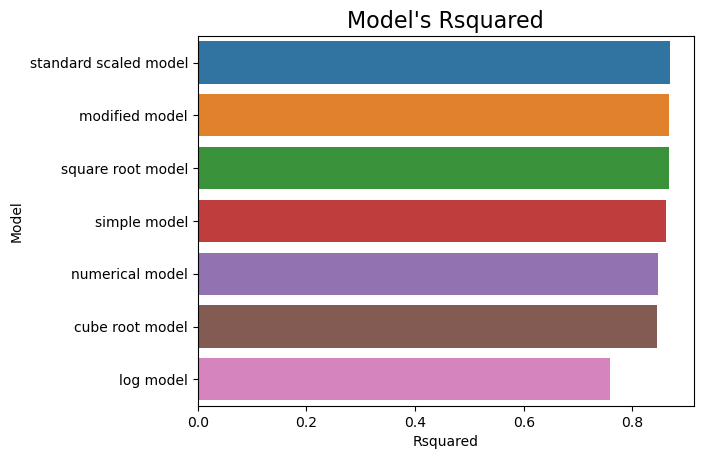

In [213]:
sns.barplot(data=final.sort_values('Rsquared',ascending=0),y='Model',x='Rsquared')
plt.title("Model's Rsquared",size=16);

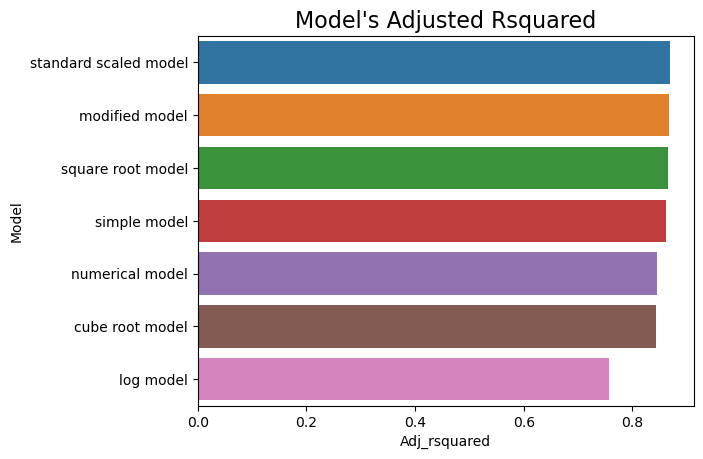

In [215]:
sns.barplot(data=final.sort_values('Adj_rsquared',ascending=0),y='Model',x='Adj_rsquared')
plt.title("Model's Adjusted Rsquared",size=16);

In [217]:
Adj_rsns.barplot(data=final.sort_values('Rmse',ascending=0),y='Model',x='Rmse')
plt.title("Model's RMSE",size=16);

NameError: name 'Adj_rsns' is not defined